In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyreadr
import numpy as np

Import data

Start by running locally, we'll work our way up to reading from the internet

In [2]:
class State:
    def __init__(self, inp_name, inp_data, inp_paths):
        self.name = inp_name
        
        self.data = inp_data  # pandas dataframe object
        
        self.paths = inp_paths  # dictionary object.  
        # Always follows the format useful_id --> (name_in_data, dict(levels)).
        # Levels doesn't always exist, but is needed for variables like departure
        

This code is setting up the minnesota state

In [10]:
states = {}
paths = {}
paths['county'] = ['countyname']
paths['year'] = ['sentyear']
paths['district'] = ['district']
paths['race'] = ['race', {0:'NA', 
                                 1:'White', 
                                 2:'Black', 
                                 3:'American Indian',
                                 4: 'Hispanic',
                                 5: 'Asian',
                                 6: ' Other',
                                 7: 'Unknown'}]
paths['departure'] = ['durdep', {0:'Within Range', 
                                 1:'Above Departure', 
                                 2:'Below Range', 
                                 3:'Missing, Indeterminable, or Inapplicable'}]
paths['judge'] = ['judge']
paths['sex'] = ['sex', {1: 'male', 2: 'female'}]
paths['age'] = ['Agecat', {1: 'under 18', 2: '18-21', 3: '22-25', 4: '26-30',5: '31-40',6: '41-50',7: '51+'}]


states['minnesota'] = State('minnesota', pd.read_csv('allmnclean.csv', low_memory = False), paths)

There are two functions here, one is a quick plotting funciton and the second is the state aggregate function

In [11]:
def plot_departures(departure_output, departure_porportions, subgroup, s = True):
    subgroup_str = ''
    for item in subgroup:
        subgroup_str += str(item) + ' '
    if s:  
        subgroup_str[-1]='s'
    fig, ax = plt.subplots(figsize = (10,7))
    
    bar_colors = ['red', 'grey', 'blue', 'teal']
    
    barh = ax.barh(departure_output, departure_porportions, color=bar_colors)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('percentage')
    
    ##ax.bar_label(barh)
    ##for bars in ax.containers:
        ##ax.bar_label(barh)
    
    ttl = 'Porportional sentances for '+ subgroup_str
    ax.set_title(ttl)



def state_aggregate(stateobj, years = None):
    subset_dat = stateobj.data
    if years != None:
        subset_dat = stateobj.data[stateobj.paths['year'] == years]
        
    counts = subset_dat.groupby(stateobj.paths['departure'][0]).count()
    counts = counts.rename(stateobj.paths['departure'][1])
    counts = counts.iloc[:,0]
     
    order_of_outputs = ['Above Departure', 'Within Range', 'Below Range', 'Missing, Indeterminable, or Inapplicable']
    porportions_list = []
    for item in order_of_outputs:
        porportions_list.append(round((100 * counts.at[item]  /  subset_dat.shape[0]),1))
    
    plot_departures(order_of_outputs, porportions_list, [stateobj.name], s = False)
    
    return counts

durdep
Within Range                                254148
Above Departure                               5875
Below Range                                  22240
Missing, Indeterminable, or Inapplicable     12204
Name: sentyear, dtype: int64

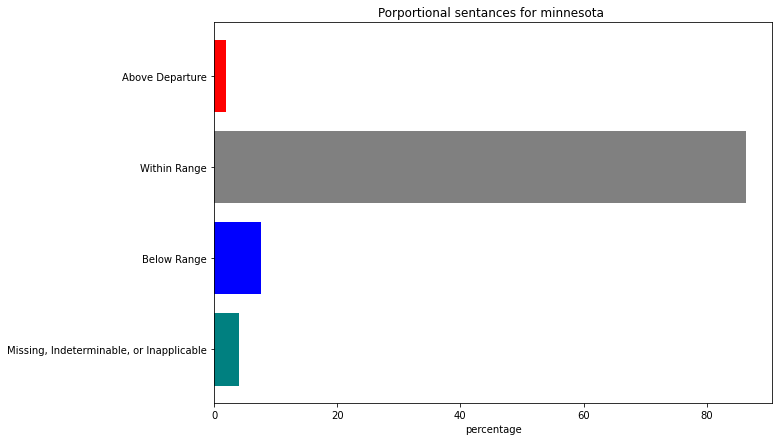

In [12]:
state_aggregate(states['minnesota'])

In [13]:
def race_aggregate(stateobj, years = None):
    subset_dat = stateobj.data
    if years != None:
        subset_dat = stateobj.data[stateobj.paths['year'] == years]
        
    counts = subset_dat.groupby(stateobj.paths['race'][0]).count()
    counts = counts.rename(stateobj.paths['race'][1])
    counts = counts.iloc[:,0]
    
    return counts

In [14]:
race_aggregate(states['minnesota'])

race
NA                      7
White              173048
Black               76999
American Indian     21032
Hispanic            16081
Asian                7078
 Other                221
Unknown                 1
Name: sentyear, dtype: int64